<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/Stat_Maksimov_F_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Домашнее задание Проверка гипотез

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [ ]:
def check_normality(data):
    #Тест Шапиро-Уилка
    #Тест оценивает набор данных и дает количественную оценку вероятности того,
    #что данные были получены из Гауссовского (нормального) распределения.
    stat, p = st.shapiro(data)
    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

In [ ]:
data1 = st.norm.rvs(loc=50, scale=10, size=100)
data2 = st.beta.rvs(2.35, 0.635, size=100)

Text(0.5, 1.0, 'Нормальное распределение')

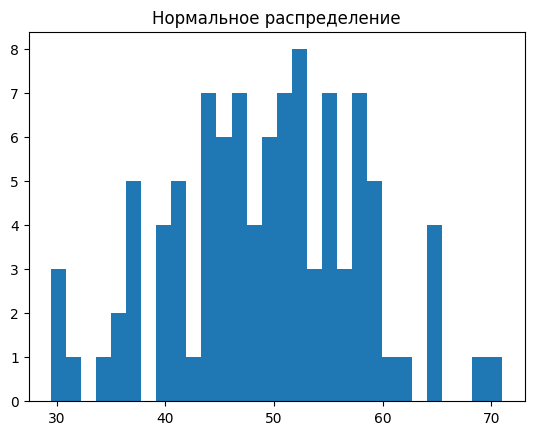

In [ ]:
plt.hist(data1, bins=30)
plt.title('Нормальное распределение')

Text(0.5, 1.0, 'Бета распределение')

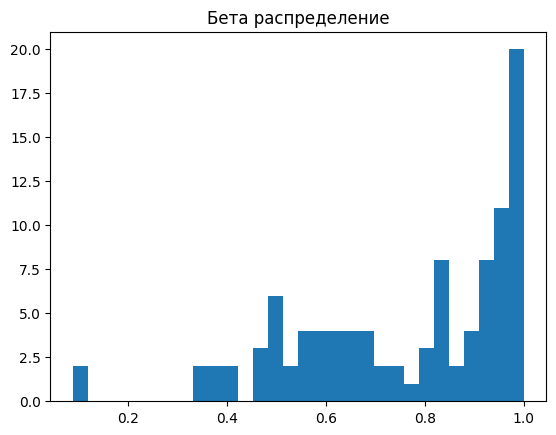

In [ ]:
plt.hist(data2, bins=30)
plt.title('Бета распределение')

In [ ]:
#Проверка функции для нормального распределения
check_normality(data1)

Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [ ]:
#Проверка функции для не нормального распределения
check_normality(data2)

Отклоняем нулевую гипотезу >> Данные распределены не нормально


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [ ]:
alpha = 0.001
stat, p = st.ttest_ind(mens, womens)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > alpha:
  print('Не отклоняем нулевую гипотезу. Различие между выборками, вероятно, незначительно')
else:
  print('Отклоняем нулевую гипотезу. Различие между выборками, веротяно, значительно')

Статистика = 28.31364, p = 0.00000
Отклоняем нулевую гипотезу. Различие между выборками, веротяно, значительно


Text(0.5, 1.0, 'Распределения по росту мужчин и женщин')

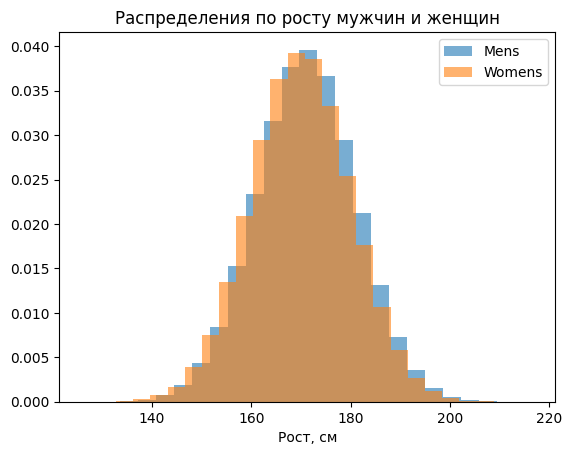

In [ ]:
plt.hist(mens, alpha=0.6, bins=25, density=True)
plt.hist(womens, alpha=0.6, bins=25, density=True)
plt.legend(['Mens', 'Womens'])
plt.xlabel('Рост, см')
plt.title('Распределения по росту мужчин и женщин')

In [ ]:
#При слишком большом размере выборки p_value будет близко к нулю, что по умолчанию будет приводить к отклонению нулевой гипотезы.
#Хотя на графике распределний видно, что различия между выборками, на самом деле, незначительно
#Попробуем использовать выборки меньшего размера для применения т-теста Стьюдента

np.random.seed(42)

mens2  = st.norm.rvs(loc=171, scale=10, size=1400)
womens2 = st.norm.rvs(loc=170, scale=10, size=1400)

stat, p = st.ttest_ind(mens2, womens2)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > alpha:
  print('Не отклоняем нулевую гипотезу. Различие между выборками, вероятно, незначительно')
else:
  print('Отклоняем нулевую гипотезу. Различие между выборками, веротяно, значительно')

Статистика = 2.65312, p = 0.00802
Не отклоняем нулевую гипотезу. Различие между выборками, вероятно, незначительно


<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [ ]:
#Проверка распределения по группе тестирования
check_normality(test_team)

Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
#Проверка распределения по команде разработчиков
check_normality(developer_team)

Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
#Данные распределены ненормально, для оценки различий между двумя выборками будем использовать критерий Манна-Уитни
stat, p = st.mannwhitneyu(test_team, developer_team)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
  print('Не отклоняем нулевую гипотезу. Разницы по переутомлению между двумя командами, вероятно, нет')
else:
  print('Отклоняем нуелвую гипотезу. Разница по переутомлению между двумя командами, вероятно, есть')

Статистика = 151.50000, p = 0.82265
Не отклоняем нулевую гипотезу. Разницы по переутомлению между двумя командами, вероятно, нет


<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1]
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9]
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3]

In [ ]:
#Проверка равенства вариаций
stat, p = st.levene(only_breast, only_formula, both)
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if p > 0.05:
  print('Не отклоняем нулевую гипотезу. Вариация в группах одинаковая')
else:
  print('Отклоняем нулевую гипотезу. Вариация в группах различается')

Статистика = 0.26612, p = 0.76731
Не отклоняем нулевую гипотезу. Вариация в группах одинаковая


In [ ]:
#Однофакторный дисперсионный анализ
f_value, p_value = st.f_oneway(only_breast, only_formula, both)
print(f"Статистика = {f_value:.5f}, p = {p_value:.5f}")
if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 26.70125, p = 0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
#Для оценки различий между тремя выборками будем использовать тест Тьюки
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.DataFrame({'Method':[], 'Value':[]})
df2 = pd.DataFrame({'Method':[], 'Value':[]})
df3 = pd.DataFrame({'Method':[], 'Value':[]})
df['Value'] = only_breast
df['Method'] = df['Method'].fillna('Only breast')
df2['Value'] = only_formula
df2['Method'] = df2['Method'].fillna('Only formula')
df3['Value'] = both
df3['Method'] = df3['Method'].fillna('Both')
res_table = pd.concat([df, df2, df3])

data_compare = pairwise_tukeyhsd(endog=res_table['Value'].values, groups=res_table['Method'], alpha=0.05)
print(data_compare)

#Исходя из полученных данных, можно прийти к выводу, что отличаются след группы:
# - Both и Only formula
# - Only breast и Only formula

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
       Both  Only breast -60.1286 0.0995 -129.1485   8.8912  False
       Both Only formula 149.2636    0.0   82.3651 216.1621   True
Only breast Only formula 209.3923    0.0  137.3508 281.4337   True
------------------------------------------------------------------


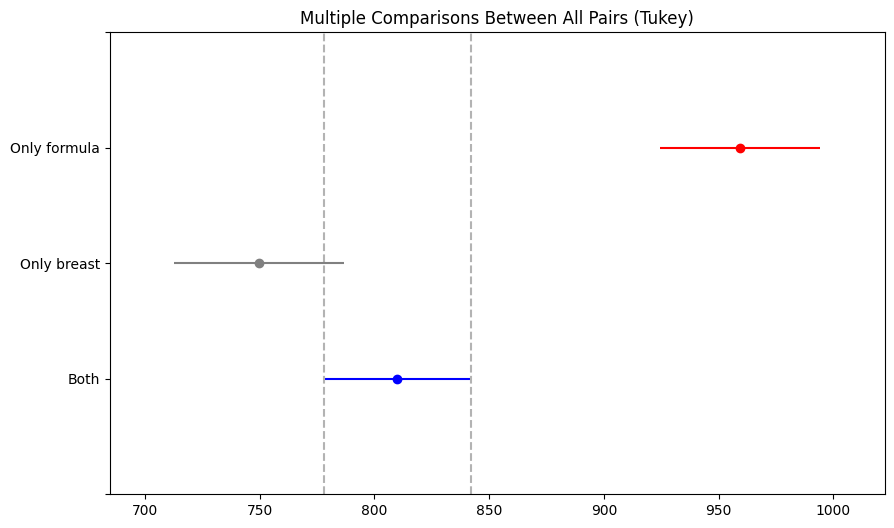

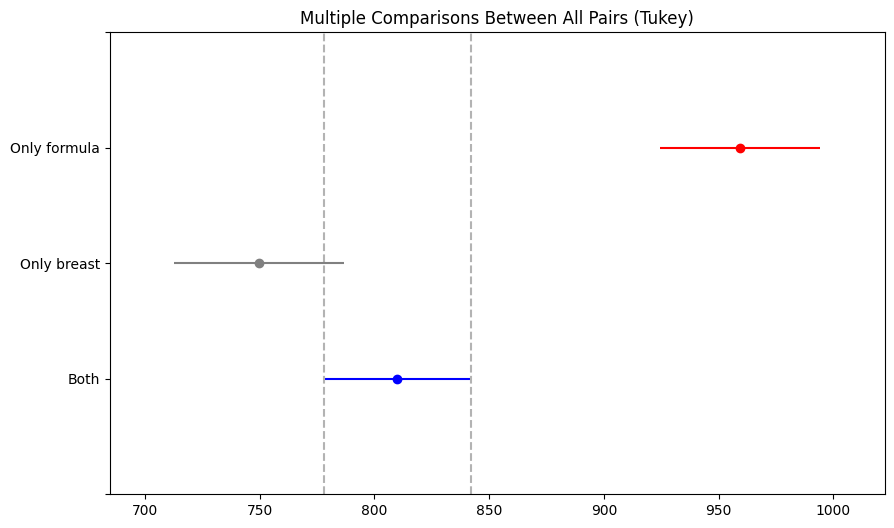

In [ ]:
data_compare.plot_simultaneous(comparison_name="Both")

#Исходя из анализа можно прийти к выводу, что данные результаты связанны из-за значительных различий в группе тех детей,
#которых кормят исключительно смесью. Промежуточное положение занимает та группа, которая использует обе практики,
#но она по значениям будет ближе к той группе детей, которых кормят грудью

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [ ]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


In [ ]:
#Тк мы имеем дело с категориальными данными, можно применить для данной задачи Тест Хи-квадрат
chi, pval, dof, exp = st.chi2_contingency(contingency_table.values)
print(f"Статистика = {chi:.5f}, p = {pval:.5f}")
if p > 0.01:
  print('Не отклоняем нулевую гипотезу. Они независимы')
  print('Cклонность к риску клиентов этой компании не зависит от их пола')
else:
  print('Отклоняем нулевую гипотезу. Они не независимы')
  print('Cклонность к риску клиентов этой компании зависит от их пола')

Статистика = 7.09422, p = 0.13099
Не отклоняем нулевую гипотезу. Они независимы
Cклонность к риску клиентов этой компании не зависит от их пола


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

In [ ]:
#Однофакторный дисперсионный анализ
f_value, p_value = st.f_oneway(youtube, instagram, facebook)
print(f"Статистика = {f_value:.5f}, p = {p_value:.5f}")
if p_value > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 21.28190, p = 0.00000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
#Задача аналогична Заданию 4. Поэтому более опционально будет провести повторно анализ через тест Тьюки и графически опеределить,
#с какими значениями вызваны данные различия
df_youtube = pd.DataFrame({'Platform':[], 'Value':[]})
df_instagram = pd.DataFrame({'Platform':[], 'Value':[]})
df_facebook = pd.DataFrame({'Platform':[], 'Value':[]})
df_youtube['Value'] = youtube
df_youtube['Platform'] = df_youtube['Platform'].fillna('YouTube')
df_instagram['Value'] = instagram
df_instagram['Platform'] = df_instagram['Platform'].fillna('Instagram')
df_facebook['Value'] = facebook
df_facebook['Platform'] = df_facebook['Platform'].fillna('Facebook')
adv_table = pd.concat([df_youtube, df_instagram, df_facebook])

data_compare2 = pairwise_tukeyhsd(endog=adv_table['Value'].values, groups=adv_table['Platform'], alpha=0.05)
print(data_compare2)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
 Facebook Instagram   12.1333 0.9619  -98.8691  123.1358  False
 Facebook   YouTube -251.8667    0.0 -362.8691 -140.8642   True
Instagram   YouTube    -264.0    0.0 -375.0024 -152.9976   True
---------------------------------------------------------------


In [ ]:
#Можно провести тест ТЬюки и другим способом
tukey2 = st.tukey_hsd(youtube, instagram, facebook)
print(tukey2)

#Аналогично с предыдущими данными, можно предположить, что только между группами 1-2 (instagram-facebook)
#данные не сильно различаются

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -264.000     0.000  -375.002  -152.998
 (0 - 2)   -251.867     0.000  -362.869  -140.864
 (1 - 0)    264.000     0.000   152.998   375.002
 (1 - 2)     12.133     0.962   -98.869   123.136
 (2 - 0)    251.867     0.000   140.864   362.869
 (2 - 1)    -12.133     0.962  -123.136    98.869



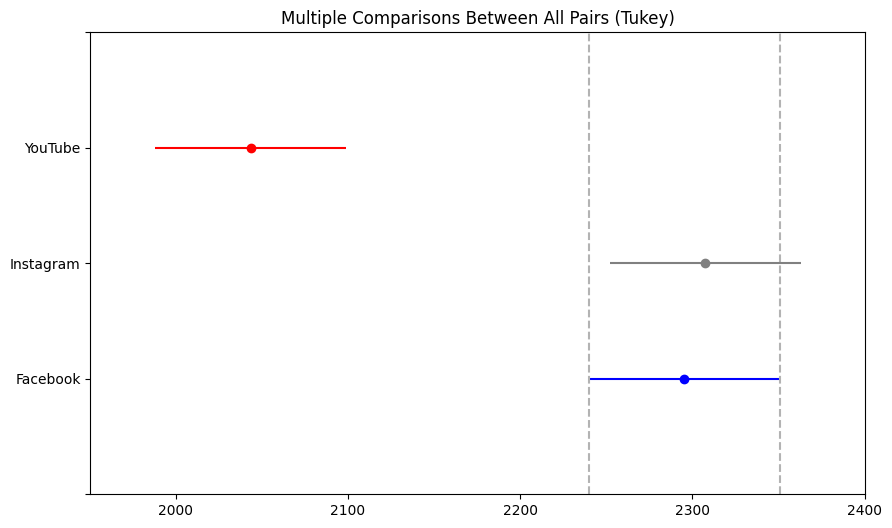

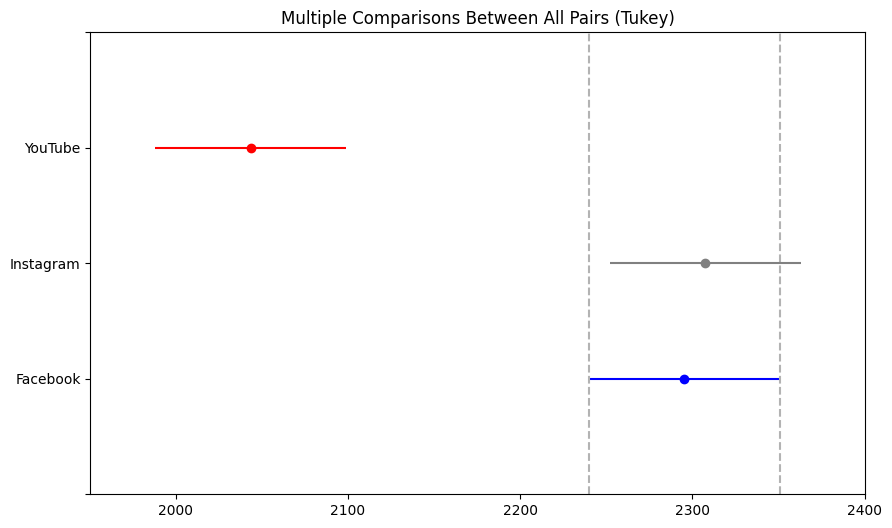

In [ ]:
data_compare2.plot_simultaneous(comparison_name="Facebook")

# Исходя из графика, можно предположить, что количество клиентов, привлеченных Youtube значительно ниже,
# чем в двух остальных платформах